# Yesterday’s problems

As much as I'm able and have time for, I'll do my best to run dwon answers to problems that were left unsolved each day

## Controling swatches in the legend

TKTK

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randint(0, 10, 5)


def bar():
    _fig = plt.figure()
    _ax = fig.add_axes()
    handles = []
    for i in data:
        handles.append(_ax.bar(i))
    plt.legend(handles, data)
    return _fig, _ax


bar()
plt.show()


AttributeError: 'NoneType' object has no attribute 'bar'

<Figure size 432x288 with 0 Axes>

## [No more shark attacks.](https://www.youtube.com/watch?v=VdDVkHqNT2c) 

Hooray!

Today we'll be graphing a dataset known as [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). It's an incredibly dataset in the history of data visualization because it very elegantly and potently made the argument that visualization can be as critical as maths and statistics. As far as I know, no one knows how Anscombe created these datasets, which is rather fasicnating to me---especially since they were created rather recently.

In [ ]:
x123 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 
               7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 
               6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 
               6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 
               5.25, 12.50, 5.56, 7.91, 6.89])

Each of the four datasets has unique *y* values. the first three share *x* values, the fourth's are unique. Despite the dissimilarities, they share a lot of summary statistics. Below we show this with some simple `numpy`.

In [139]:
for i, (x, y) in enumerate([[x123, y1], [x123, y2], [x123, y3], [x4, y4]]):
    print('\n{}'.format(i+1))
    print('mean(x): {:.3f}, var(x): {:.2f}'.format(
        np.mean(x), np.var(x)
    ))
    print('mean(y): {:.3f}, var(y): {:.2f}'.format(
        np.mean(y), np.var(y)
    ))
    print('corr(x, y): {:.0f}'.format(
        np.correlate(x, y)[0]
    ))
    print('y = {:.1f}x + {:.1f}'.format(
        *np.linalg.lstsq(np.array([x, np.ones(len(x))]).T, y)[0]))


0
mean(x): 9.000, var(x): 10.00
mean(y): 7.501, var(y): 3.75
corr(x, y): 798
y = 0.5x + 3.0

1
mean(x): 9.000, var(x): 10.00
mean(y): 7.501, var(y): 3.75
corr(x, y): 798
y = 0.5x + 3.0

2
mean(x): 9.000, var(x): 10.00
mean(y): 7.500, var(y): 3.75
corr(x, y): 797
y = 0.5x + 3.0

3
mean(x): 9.000, var(x): 10.00
mean(y): 7.501, var(y): 3.75
corr(x, y): 798
y = 0.5x + 3.0


/Users/nathanmatteson/.virtualenvs/datavis_bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


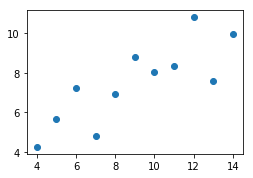

In [143]:
def scatter(x, y):
    _fig = plt.figure(figsize=(3, 2), facecolor='white')
    _ax = _fig.add_axes([0, 0, 1, 1])
    _ax.scatter(x, y)
    return _fig, _ax
    

fig, ax = scatter(x123, y1)
plt.show()

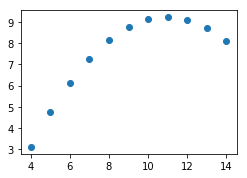

In [144]:
fig, ax = scatter(x123, y2)
plt.show()

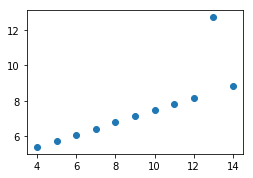

In [145]:
fig, ax = scatter(x123, y3)
plt.show()

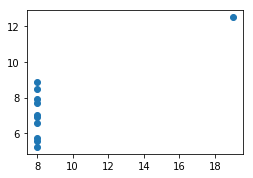

In [146]:
fig, ax = scatter(x4, y4)
plt.show()

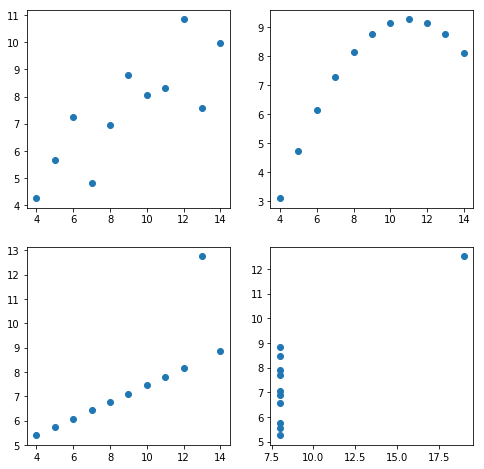

In [157]:
# `floor()` is useful for navigating rows and columns below
from math import floor


def ensemble(*args):
    rows = 2
    cols = 2
    # `subplots` returns a figure and a tuple of axes. 
    # Keyword arguments to `figure()` can be passed at the 
    # end of the list of arguments.
    _fig, _axs = plt.subplots(
        rows, cols, figsize=(8, 8), facecolor='white')
    for i, (x, y) in enumerate(args):
        # The tuple of axes returned by `subplots()` is 
        # ordered as rows and columns. So we need to navigate
        # the indices of rows and columns when we retrieve them.
        _axs[floor(i / rows)][i % cols].scatter(x, y)
    plt.show()


ensemble([x123, y1], [x123, y2], [x123, y3], [x4, y4])

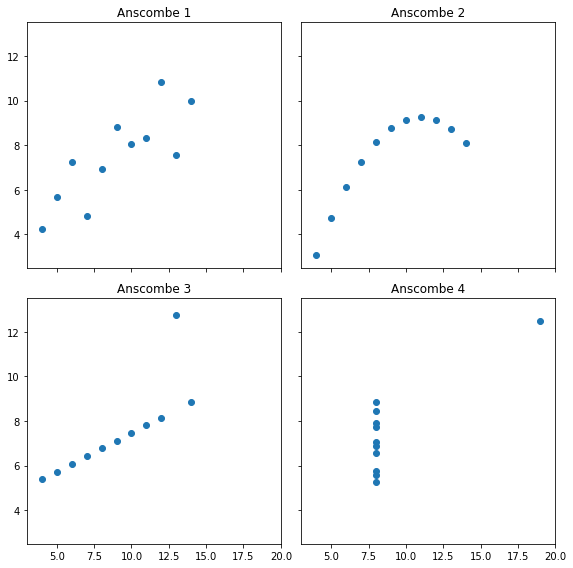

In [169]:
def ensemble(*args):
    rows = 2
    cols = 2
    _fig, _axs = plt.subplots(
        rows, cols, sharex='all', sharey='all', 
        figsize=(8, 8), facecolor='white',
    )
    plt.xlim((3, 20))
    plt.ylim((2.5, 13.5))
    for i, (x, y) in enumerate(args):
        _ax = _axs[floor(i / rows)][i % cols]
        _ax.scatter(x, y)
        _ax.set_title('Anscombe {}'.format(i+1))
    plt.tight_layout()
    plt.show()


pairs = [x123, y1], [x123, y2], [x123, y3], [x4, y4]
ensemble(*pairs)

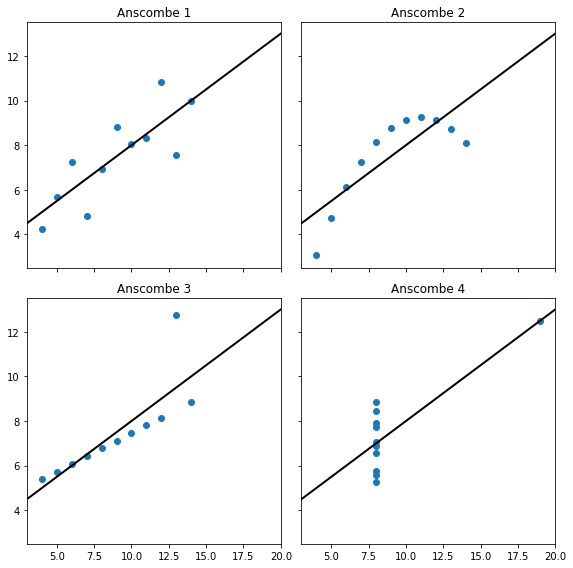

In [173]:
def regline(x):
    return .5 * x + 3


def ensemble(*args):
    rows = 2
    cols = 2
    _fig, _axs = plt.subplots(
        rows, cols, sharex='all', sharey='all', 
        figsize=(8, 8), facecolor='white',
    )
    plt.xlim((3, 20))
    plt.ylim((2.5, 13.5))
    for i, (x, y) in enumerate(args):
        _ax = _axs[floor(i / rows)][i % cols]
        _ax.scatter(x, y)
        _ax.plot([3, 20], [regline(3), regline(20)], 'k-', lw=2)
        _ax.set_title('Anscombe {}'.format(i+1))
    plt.tight_layout()
    plt.show()


pairs = [x123, y1], [x123, y2], [x123, y3], [x4, y4]
ensemble(*pairs)